# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [13]:
df = pd.read_csv('bikeshare_hour_count.csv')

In [18]:
hour = df.hour.values.reshape(-1,1)
friday = df.friday.values.reshape(-1,1)

In [20]:
#1-Friday
xtrain, xtest, ytrain, ytest = train_test_split(hour, friday, test_size = 0.2)
linear = linear_model.LinearRegression().fit(xtrain, ytrain)

In [23]:
xtrain15 = PolynomialFeatures(degree = 15).fit_transform(xtrain)
xtest15 = PolynomialFeatures(degree = 15).fit_transform(xtest)
linear15 = linear_model.LinearRegression().fit(xtrain15, ytrain)

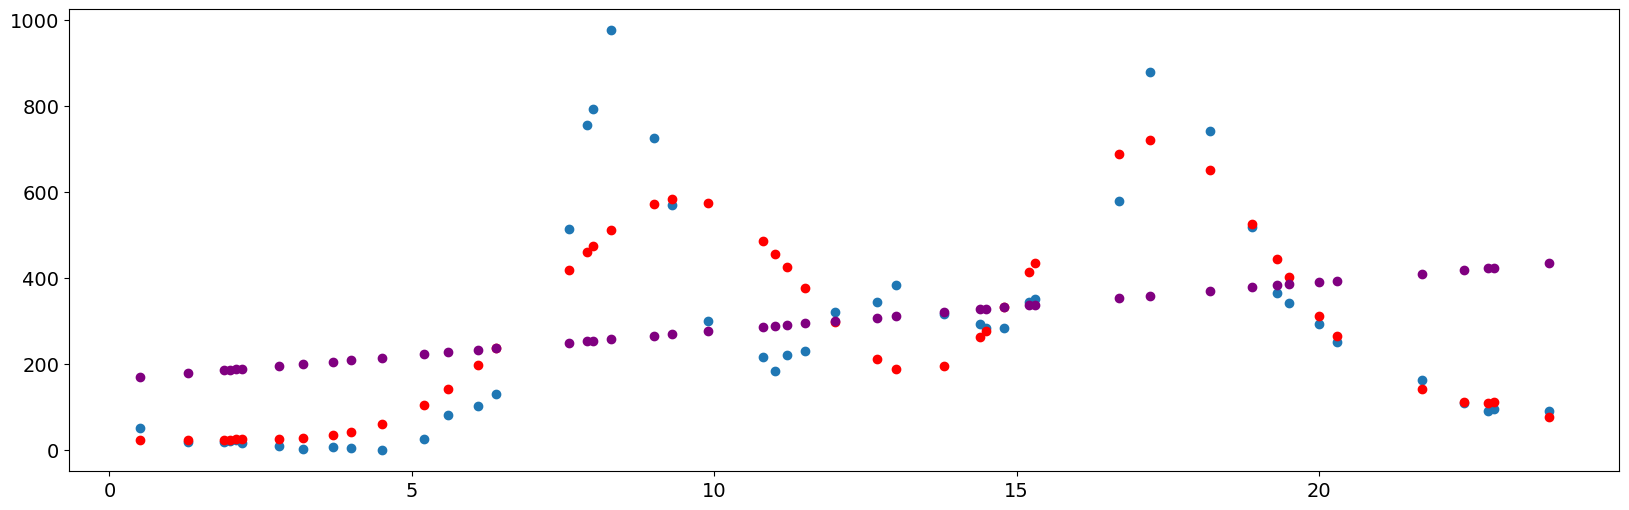

In [26]:
plt.scatter(xtest, ytest)
plt.scatter(xtest, linear15.predict(xtest15), c = 'red')
plt.scatter(xtest, linear.predict(xtest), c = 'purple')

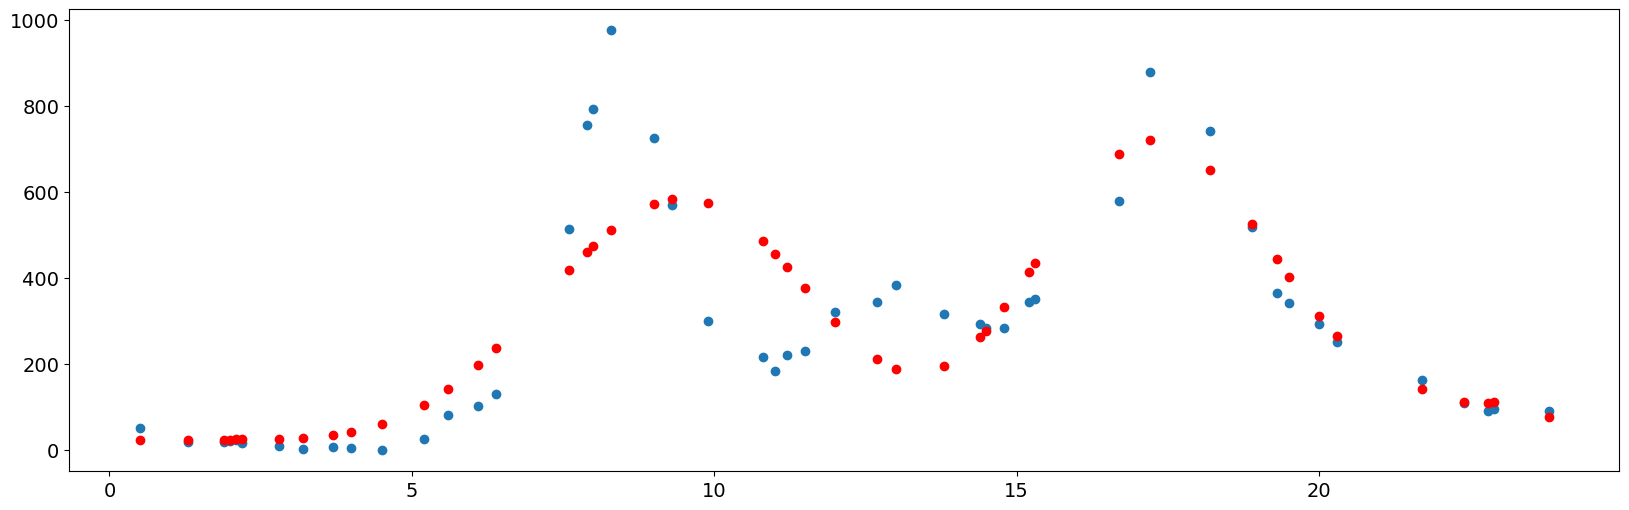

In [27]:
##Taking normal linear prediction out for clarity
plt.scatter(xtest, ytest)
plt.scatter(xtest, linear15.predict(xtest15), c = 'red')

In [30]:
#Training Error
(
metrics.mean_squared_error(ytrain, linear15.predict(xtrain15)),
metrics.mean_absolute_error(ytrain, linear15.predict(xtrain15))
)

(19934.108989660843, 91.20506199152389)

In [31]:
#Testing Error
(
metrics.mean_squared_error(ytest, linear15.predict(xtest15)),
metrics.mean_absolute_error(ytest, linear15.predict(xtest15))
)

(18728.24953373297, 91.26487374003807)

In [112]:
#2-Credit Dataset - Predict Credit Rating greater than 300
#RatingKey represents a 1 if the rating is equal to or higher a 300 and a 0 if it is under
data = pd.read_csv('Credit.csv')
test = pd.read_csv('Credit_Test.csv')

In [113]:
data.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'RatingKey'],
      dtype='object')

In [114]:
non_numeric_columns = ['Gender', 'Student', 'Married', 'Ethnicity', 'Rating']

In [115]:
x = data.copy().drop(non_numeric_columns, axis = 1)

In [116]:
xt = test.copy().drop(non_numeric_columns, axis = 1)

In [117]:
xt.RatingKey.value_counts()

1    176
0    124
Name: RatingKey, dtype: int64

In [118]:
model = DecisionTreeClassifier(criterion = 'entropy')

In [119]:
model.fit(x.drop(['RatingKey'], axis = 1), x.RatingKey)

DecisionTreeClassifier(criterion='entropy')

In [120]:
list(zip(x.drop(['RatingKey'], axis = 1).columns, model.feature_importances_))

[('Income', 0.0),
 ('Limit', 1.0),
 ('Cards', 0.0),
 ('Age', 0.0),
 ('Education', 0.0),
 ('Balance', 0.0)]

In [121]:
x.drop(['RatingKey'] , axis = 1).head()

,Income,Limit,Cards,Age,Education,Balance
0,14.891,3606,2,34,11,333
1,106.025,6645,3,82,15,903
2,104.593,7075,4,71,11,580
3,148.924,9504,3,36,11,964
4,55.882,4897,2,68,16,331


In [122]:
set(x.columns) - set(xt.columns)

set()

In [129]:
predictions = model.predict(xt.drop(['RatingKey'], axis = 1))

In [130]:
predictions_train = model.predict(x.drop(['RatingKey'], axis = 1))

In [131]:
xt.drop(['RatingKey'], axis = 1).head()

,Income,Limit,Cards,Age,Education,Balance
0,21.153,3736,1,41,11,298
1,17.976,2433,3,70,16,431
2,68.713,7582,2,56,16,1587
3,146.183,9540,6,66,15,1050
4,15.846,4768,4,53,12,745


In [134]:
accuracy_score(xt.RatingKey, predictions)

0.9566666666666667

In [136]:
predictions.shape, xt.RatingKey.values.shape

((300,), (300,))

In [137]:
(xt.RatingKey.values == predictions).sum()/len(predictions)

0.9566666666666667

In [138]:
np.logical_and(xt.RatingKey.values, predictions).sum()

175

In [139]:
confusion_matrix(xt.RatingKey, predictions)

array([[112,  12],
       [  1, 175]], dtype=int64)

In [140]:
print(classification_report(xt.RatingKey, predictions))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95       124
           1       0.94      0.99      0.96       176

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300

